In [2]:
# Dependencies
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
import requests
import json
from config import gkey

In [3]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [4]:
# Extracting Data from CSV to Jupyter-Notebook
prices_file = "Resources/prices.csv"
places_file = "Resources/places.csv"
prices_df = pd.read_csv(prices_file)
places_df = pd.read_csv(places_file)

In [5]:
# Cleaning Columns on Prices DataFrame
prices_df = prices_df.drop('places', axis = 1)
prices_df = prices_df.drop('place', axis = 1)
prices_df

,place_id,gas_price,type
0,11703.0,18.69,regular
1,NaN,19.69,premium
2,11702.0,18.19,regular
3,NaN,19.79,premium
4,NaN,18.25,diesel
...,...,...,...
33210,NaN,19.59,premium
33211,NaN,18.60,diesel
33212,2807.0,17.99,regular
33213,2807.0,19.99,premium


In [6]:
# Creating a column to replace NaNs with Places_ID
Place_ID = prices_df['place_id'].fillna(method='ffill')
# Adding Column to existing prices DataFrame
prices_df['Place_ID'] = Place_ID
# Eliminating original place_id from DataFrame
prices_df = prices_df.drop('place_id', axis = 1)
# Rearrange DataFrame
prices_df = prices_df[['Place_ID','gas_price','type']]
# Rename Place_ID
prices_df.columns = ['_place_id', 'gas_price','type']
prices_df

,_place_id,gas_price,type
0,11703.0,18.69,regular
1,11703.0,19.69,premium
2,11702.0,18.19,regular
3,11702.0,19.79,premium
4,11702.0,18.25,diesel
...,...,...,...
33210,11704.0,19.59,premium
33211,11704.0,18.60,diesel
33212,2807.0,17.99,regular
33213,2807.0,19.99,premium


In [7]:
# Merging DataFrames and Renaming column _place_id
Gas_Stations_df = pd.merge(places_df, prices_df, on="_place_id")
Gas_Stations_df = Gas_Stations_df.rename(columns={"_place_id":"place_id",
                                                 "location/x":"Lng",
                                                 "location/y":"Lat",
                                                 "type":"gas type"})
Gas_Stations_df


,name,cre_id,Lng,Lat,place_id,gas_price,gas type
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
1,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,19.35,premium
2,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,18.45,diesel
3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
4,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.99,premium
...,...,...,...,...,...,...,...
33210,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,18.59,premium
33211,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,18.89,diesel
33212,JAGREGAS 2 S.A. DE C.V.,PL/23510/EXP/ES/2020,-100.41290,20.67198,27304,16.99,regular
33213,JAGREGAS 2 S.A. DE C.V.,PL/23510/EXP/ES/2020,-100.41290,20.67198,27304,17.30,premium


In [8]:
gas_id = Gas_Stations_df.drop_duplicates(subset="place_id")
gas_id = gas_id.reset_index(drop=False)
gas_id

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type
0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular
3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular
4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular
...,...,...,...,...,...,...,...,...
12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular
12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular
12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular
12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular


In [9]:
gas_id["Rating"] = ""
gas_id["User Ratings"] ="" 
gas_id["Google_Name"] = ""
gas_id["Address"]= ""
gas_id["Types"]= ""
gas_id.head()

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,,,,,
1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,,,,,
2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,,,,,
3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,,,,,
4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,,,,,


In [10]:
params = {
    "rankby":"distance",
    "type": "gas_station",
    "keyword": "fuel station",
    "key": gkey    
}

# Hit the Google Places API for each city's coordinates.
url_base = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [11]:
gkey

''

In [12]:
carlos_df = gas_id.iloc[0:2491,:]
rodrigo_df = gas_id.iloc[2491:4983,:]
pau_df = gas_id.iloc[4983:7475,:]
eduardo_df = gas_id.iloc[7475:9967,:]
sam_df =  gas_id.iloc[9967:12460,:]

In [22]:
# Store the first Hotel result into the DataFrame.
json_list = []
for index, row in pau_df.iterrows():
    lat=row["Lat"]
    lon=row["Lng"]
        
    params["location"] = f"{lat},{lon}"
    
    print(f"Results for observation: {index}")
    try:
        response = requests.get(url_base, params=params).json()
        pau_df.loc[index, "Rating"] = response["results"][0]["rating"]
        pau_df.loc[index, "User Ratings"] = response["results"][0]["user_ratings_total"]
        pau_df.loc[index, "Google_Name"] = response["results"][0]["name"]
        pau_df.loc[index, "Address"] = response["results"][0]["vicinity"]
        string = response["results"][0]["types"]
        string_value = listToString(string)
        string_value = string_value.replace(" ",", ")
        pau_df.loc[index, "Types"] = string_value
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# To storage the requests
        json_list.append(response)
    

    

Results for observation: 4983


C:\Users\Carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Results for observation: 4984
Results for observation: 4985
Results for observation: 4986
Results for observation: 4987
Results for observation: 4988
Results for observation: 4989
Results for observation: 4990
Results for observation: 4991
Results for observation: 4992
Results for observation: 4993
Results for observation: 4994
Results for observation: 4995
Results for observation: 4996
Results for observation: 4997
Results for observation: 4998
Results for observation: 4999
Results for observation: 5000
Results for observation: 5001
Results for observation: 5002
Results for observation: 5003
Results for observation: 5004
Results for observation: 5005
Results for observation: 5006
Results for observation: 5007
Results for observation: 5008
Results for observation: 5009
Results for observation: 5010
Results for observation: 5011
Results for observation: 5012
Results for observation: 5013
Results for observation: 5014
Results for observation: 5015
Results for observation: 5016
Results fo

Results for observation: 5256
Results for observation: 5257
Results for observation: 5258
Results for observation: 5259
Results for observation: 5260
Results for observation: 5261
Results for observation: 5262
Results for observation: 5263
Results for observation: 5264
Results for observation: 5265
Results for observation: 5266
Results for observation: 5267
Results for observation: 5268
Results for observation: 5269
Results for observation: 5270
Results for observation: 5271
Results for observation: 5272
Results for observation: 5273
Results for observation: 5274
Results for observation: 5275
Results for observation: 5276
Results for observation: 5277
Results for observation: 5278
Results for observation: 5279
Results for observation: 5280
Results for observation: 5281
Results for observation: 5282
Results for observation: 5283
Results for observation: 5284
Results for observation: 5285
Results for observation: 5286
Results for observation: 5287
Results for observation: 5288
Results fo

Results for observation: 5530
Results for observation: 5531
Results for observation: 5532
Results for observation: 5533
Results for observation: 5534
Results for observation: 5535
Results for observation: 5536
Results for observation: 5537
Results for observation: 5538
Results for observation: 5539
Results for observation: 5540
Results for observation: 5541
Results for observation: 5542
Results for observation: 5543
Results for observation: 5544
Results for observation: 5545
Results for observation: 5546
Results for observation: 5547
Results for observation: 5548
Results for observation: 5549
Results for observation: 5550
Results for observation: 5551
Results for observation: 5552
Results for observation: 5553
Results for observation: 5554
Results for observation: 5555
Results for observation: 5556
Results for observation: 5557
Results for observation: 5558
Results for observation: 5559
Results for observation: 5560
Results for observation: 5561
Results for observation: 5562
Results fo

Results for observation: 5804
Results for observation: 5805
Results for observation: 5806
Results for observation: 5807
Results for observation: 5808
Results for observation: 5809
Results for observation: 5810
Results for observation: 5811
Results for observation: 5812
Results for observation: 5813
Results for observation: 5814
Results for observation: 5815
Results for observation: 5816
Results for observation: 5817
Results for observation: 5818
Results for observation: 5819
Results for observation: 5820
Results for observation: 5821
Results for observation: 5822
Results for observation: 5823
Results for observation: 5824
Results for observation: 5825
Results for observation: 5826
Results for observation: 5827
Results for observation: 5828
Results for observation: 5829
Results for observation: 5830
Results for observation: 5831
Results for observation: 5832
Results for observation: 5833
Results for observation: 5834
Results for observation: 5835
Results for observation: 5836
Results fo

Results for observation: 6078
Results for observation: 6079
Results for observation: 6080
Results for observation: 6081
Results for observation: 6082
Results for observation: 6083
Results for observation: 6084
Results for observation: 6085
Results for observation: 6086
Results for observation: 6087
Results for observation: 6088
Results for observation: 6089
Results for observation: 6090
Results for observation: 6091
Results for observation: 6092
Results for observation: 6093
Results for observation: 6094
Results for observation: 6095
Results for observation: 6096
Results for observation: 6097
Results for observation: 6098
Results for observation: 6099
Results for observation: 6100
Results for observation: 6101
Results for observation: 6102
Results for observation: 6103
Results for observation: 6104
Results for observation: 6105
Results for observation: 6106
Results for observation: 6107
Results for observation: 6108
Results for observation: 6109
Results for observation: 6110
Results fo

Results for observation: 6352
Results for observation: 6353
Results for observation: 6354
Results for observation: 6355
Results for observation: 6356
Results for observation: 6357
Results for observation: 6358
Results for observation: 6359
Results for observation: 6360
Results for observation: 6361
Results for observation: 6362
Results for observation: 6363
Results for observation: 6364
Results for observation: 6365
Results for observation: 6366
Results for observation: 6367
Results for observation: 6368
Results for observation: 6369
Results for observation: 6370
Results for observation: 6371
Results for observation: 6372
Results for observation: 6373
Results for observation: 6374
Results for observation: 6375
Results for observation: 6376
Results for observation: 6377
Results for observation: 6378
Results for observation: 6379
Results for observation: 6380
Results for observation: 6381
Results for observation: 6382
Results for observation: 6383
Results for observation: 6384
Results fo

Results for observation: 6626
Results for observation: 6627
Results for observation: 6628
Results for observation: 6629
Results for observation: 6630
Results for observation: 6631
Results for observation: 6632
Results for observation: 6633
Results for observation: 6634
Results for observation: 6635
Results for observation: 6636
Results for observation: 6637
Results for observation: 6638
Results for observation: 6639
Results for observation: 6640
Results for observation: 6641
Results for observation: 6642
Results for observation: 6643
Results for observation: 6644
Results for observation: 6645
Results for observation: 6646
Results for observation: 6647
Results for observation: 6648
Results for observation: 6649
Results for observation: 6650
Results for observation: 6651
Results for observation: 6652
Results for observation: 6653
Results for observation: 6654
Results for observation: 6655
Results for observation: 6656
Results for observation: 6657
Results for observation: 6658
Results fo

Results for observation: 6900
Results for observation: 6901
Results for observation: 6902
Results for observation: 6903
Results for observation: 6904
Results for observation: 6905
Results for observation: 6906
Results for observation: 6907
Results for observation: 6908
Results for observation: 6909
Results for observation: 6910
Results for observation: 6911
Results for observation: 6912
Results for observation: 6913
Results for observation: 6914
Results for observation: 6915
Results for observation: 6916
Results for observation: 6917
Results for observation: 6918
Results for observation: 6919
Results for observation: 6920
Results for observation: 6921
Results for observation: 6922
Results for observation: 6923
Results for observation: 6924
Results for observation: 6925
Results for observation: 6926
Results for observation: 6927
Results for observation: 6928
Results for observation: 6929
Results for observation: 6930
Results for observation: 6931
Results for observation: 6932
Results fo

Results for observation: 7174
Results for observation: 7175
Results for observation: 7176
Results for observation: 7177
Results for observation: 7178
Results for observation: 7179
Results for observation: 7180
Results for observation: 7181
Results for observation: 7182
Results for observation: 7183
Results for observation: 7184
Results for observation: 7185
Results for observation: 7186
Results for observation: 7187
Results for observation: 7188
Results for observation: 7189
Results for observation: 7190
Results for observation: 7191
Results for observation: 7192
Results for observation: 7193
Results for observation: 7194
Results for observation: 7195
Results for observation: 7196
Results for observation: 7197
Results for observation: 7198
Results for observation: 7199
Results for observation: 7200
Results for observation: 7201
Results for observation: 7202
Results for observation: 7203
Results for observation: 7204
Results for observation: 7205
Results for observation: 7206
Results fo

Results for observation: 7448
Results for observation: 7449
Results for observation: 7450
Results for observation: 7451
Results for observation: 7452
Results for observation: 7453
Results for observation: 7454
Results for observation: 7455
Results for observation: 7456
Results for observation: 7457
Results for observation: 7458
Results for observation: 7459
Results for observation: 7460
Results for observation: 7461
Results for observation: 7462
Results for observation: 7463
Results for observation: 7464
Results for observation: 7465
Results for observation: 7466
Results for observation: 7467
Results for observation: 7468
Results for observation: 7469
Results for observation: 7470
Results for observation: 7471
Results for observation: 7472
Results for observation: 7473
Results for observation: 7474


In [24]:
part3 = pau_df


In [14]:
pau_df

,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
4983,13215,Servicio La Parada SA de CV,PL/4839/EXP/ES/2015,-98.05087,19.38949,7165,17.98,regular,,,,,
4984,13218,SERVIARAGON S.A DE C.V,PL/4695/EXP/ES/2015,-98.61885,18.31530,7166,18.89,regular,,,,,
4985,13221,Operadora de Gasolineras A.P. S.A. de C.V.,PL/4911/EXP/ES/2015,-99.69855,19.28886,7167,17.73,regular,,,,,
4986,13224,GASOLINERA CRISTOBAL COLON DE JUCHITAN S.A. DE...,PL/3531/EXP/ES/2015,-95.02547,16.44553,7168,18.39,regular,,,,,
4987,13227,"CARBURANTES, S.A. DE C.V.",PL/4838/EXP/ES/2015,-99.51218,27.47712,7169,12.89,regular,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,19760,"ESTACIONES MEXSON, S.A. DE C.V.",PL/8528/EXP/ES/2015,-115.51610,32.65589,9656,16.79,regular,,,,,
7471,19762,EVERARDO LARA COVARRUBIAS,PL/8697/EXP/ES/2015,-98.93101,19.41723,9657,17.60,regular,,,,,
7472,19765,SERVICIO COMONFORT SA DE CV,PL/8719/EXP/ES/2015,-99.13486,19.44478,9658,18.31,regular,,,,,
7473,19767,ALFONSO COBIAN RAMIREZ,PL/8382/EXP/ES/2015,-105.09400,20.82121,9659,19.69,regular,,,,,


In [17]:
# Eduardo (Imported the files from resources)

part1 = "Resources/part1.csv"
part2 = "Resources/part2.csv"
part3 = "Resources/part3.csv"
part4 = "Resources/part4.csv"
part5 = "Resources/part5.csv"
part1_df = pd.read_csv(part1)
part2_df = pd.read_csv(part2)
part3_df = pd.read_csv(part3)
part4_df = pd.read_csv(part4)
part5_df = pd.read_csv(part5)

In [18]:
# Concatinate all of the DataFrames into one

Frames = [part1_df,part2_df,part3_df,part4_df,part5_df]
Mexico_Gas_Stations = pd.concat(Frames)
Mexico_Gas_Stations

,Unnamed: 0,index,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,0,0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,4.3,3.0,Gasolinera Pemex,"Av de los Insurgentes No. 1910, Libramiento, T...","gas_station, point_of_interest, establishment"
1,1,3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,3.9,13.0,Pemex,"Carrt. Pachuca-Queretaro Km 58+500, Huichapan","gas_station, point_of_interest, establishment"
2,2,6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,4.3,261.0,TotalGas,"Av. López Mateos 1604, La Plata, Cd Juárez","gas_station, point_of_interest, establishment"
3,3,8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,4.0,105.0,Gasolinera Pemex,"Perif. Nte. Ricardo Flores Magón Ote. No. 950,...","gas_station, point_of_interest, establishment"
4,4,11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,4.0,10.0,Petromax,"Río Purificación 800, Luis Donaldo Colosio Mur...","gas_station, point_of_interest, establishment"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,12455,33200,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular,3.0,2.0,Servicio Independencia,Ave Siglo XXI 700,"gas_station, point_of_interest, establishment"
2489,12456,33203,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular,4.7,3.0,GUDE 4,Fresnillo,"gas_station, point_of_interest, establishment"
2490,12457,33206,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular,2.0,1.0,Gasolineros Unidos de Irapuato,"Héroes de Nacozari S/N, Nuevos Colonos Unidos,...","gas_station, point_of_interest, establishment"
2491,12458,33209,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular,3.5,2.0,Grupo Gasolinero Rivas,"Ranchito de la Cruz, Valparaíso","gas_station, point_of_interest, establishment"


In [31]:
# Data without extra indexes
Mexico_Gas_Stations

,name,cre_id,Lng,Lat,place_id,gas_price,gas type,Rating,User Ratings,Google_Name,Address,Types
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular,4.3,3.0,Gasolinera Pemex,"Av de los Insurgentes No. 1910, Libramiento, T...","gas_station, point_of_interest, establishment"
1,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular,3.9,13.0,Pemex,"Carrt. Pachuca-Queretaro Km 58+500, Huichapan","gas_station, point_of_interest, establishment"
2,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular,4.3,261.0,TotalGas,"Av. López Mateos 1604, La Plata, Cd Juárez","gas_station, point_of_interest, establishment"
3,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular,4.0,105.0,Gasolinera Pemex,"Perif. Nte. Ricardo Flores Magón Ote. No. 950,...","gas_station, point_of_interest, establishment"
4,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular,4.0,10.0,Petromax,"Río Purificación 800, Luis Donaldo Colosio Mur...","gas_station, point_of_interest, establishment"
...,...,...,...,...,...,...,...,...,...,...,...,...
2488,MEGA GASOLINERAS S.A DE C.V,PL/23515/EXP/ES/2020,-101.34460,20.72499,27295,18.79,regular,3.0,2.0,Servicio Independencia,Ave Siglo XXI 700,"gas_station, point_of_interest, establishment"
2489,"GRUPO ENERGETICO GUDE, S.A. DE C.V.",PL/23507/EXP/ES/2020,-102.88500,23.16178,27298,18.15,regular,4.7,3.0,GUDE 4,Fresnillo,"gas_station, point_of_interest, establishment"
2490,MEGA GASOLINERAS S.A DE C.V,PL/23513/EXP/ES/2020,-101.36640,20.68246,27299,18.25,regular,2.0,1.0,Gasolineros Unidos de Irapuato,"Héroes de Nacozari S/N, Nuevos Colonos Unidos,...","gas_station, point_of_interest, establishment"
2491,GRUPO GASOLINERO DEL DIAMANTE HOLZ SA DE CV,PL/23508/EXP/ES/2020,-103.40990,22.83751,27300,17.89,regular,3.5,2.0,Grupo Gasolinero Rivas,"Ranchito de la Cruz, Valparaíso","gas_station, point_of_interest, establishment"


In [35]:
Mexico_Gas_Stations.dtypes

name             object
cre_id           object
Lng             float64
Lat             float64
place_id          int64
gas_price       float64
gas type         object
Rating          float64
User Ratings    float64
Google_Name      object
Address          object
Types            object
dtype: object

KeyError: "None of [Float64Index([-116.9214, -99.74484, -106.4514, -103.3042, -98.29977, -117.0715,\n              -108.9685, -100.2918, -116.6079, -117.0457,\n              ...\n              -103.8357,  -99.1503, -100.7817, -101.5279, -100.8018, -101.3446,\n               -102.885, -101.3664, -103.4099, -100.4129],\n             dtype='float64', length=12460)] are in the [columns]"

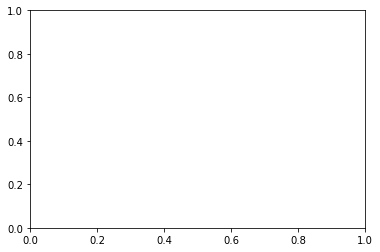

In [32]:
# Creating a Scatter Plot
x_values = Mexico_Gas_Stations['Lng']
y_values = Mexico_Gas_Stations['Lat']
Mexico_Gas_Stations.plot.scatter(x_values,y_values)
plt.show()

In [6]:
countby_type_df = Gas_Stations_df.groupby(Gas_Stations_df["type"]).count()["place_id"].to_frame()
countby_type_df = countby_type_df.rename(columns={"place_id":"Stations"})
countby_type_df

,Stations
type,
diesel,9271
premium,11552
regular,12392


In [7]:
regular_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="regular"]
premium_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="premium"]
diesel_gas = Gas_Stations_df.loc[Gas_Stations_df["type"]=="diesel"]

In [8]:
lng_regular_gas = regular_gas["lng"]
lat_regular_gas = regular_gas["lat"]
lng_premium_gas = premium_gas["lng"]
lat_premium_gas = premium_gas["lat"]
lng_diesel_gas = diesel_gas["lng"]
lat_diesel_gas = diesel_gas["lat"]

In [9]:
premium_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
1,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,19.35,premium
4,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.99,premium
7,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,13.59,premium
9,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,19.39,premium
12,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,16.39,premium


In [10]:
diesel_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
2,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,18.45,diesel
5,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.89,diesel
10,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.74,diesel
15,MULTISERVICIOS LA PILARICA SA DE CV,PL/371/EXP/ES/2015,-108.96850,25.75580,2045,19.99,diesel
20,"PETROMAX, S.A. DE C.V.",PL/439/EXP/ES/2015,-100.29180,25.77202,2046,19.49,diesel


In [11]:
regular_gas.head()

,name,cre_id,lng,lat,place_id,gas_price,type
0,"ESTACION DE SERVICIO CALAFIA, S.A. DE C.V.",PL/658/EXP/ES/2015,-116.92140,32.47641,2039,17.39,regular
3,"DIGEPE, S.A. DE C.V. (07356)",PL/902/EXP/ES/2015,-99.74484,20.30370,2040,18.65,regular
6,"DIAZ GAS, S.A. DE C.V.",PL/760/EXP/ES/2015,-106.45140,31.71947,2041,12.82,regular
8,"COMBU-EXPRESS, S.A. DE C.V.",PL/825/EXP/ES/2015,-103.30420,20.71413,2042,18.64,regular
11,"PETROMAX, S.A. DE C.V.",PL/585/EXP/ES/2015,-98.29977,26.03787,2043,14.79,regular
